In [1]:
#Importing required libraries
import os 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import calendar
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
  

%matplotlib inline

In [2]:
#Setting the working directory

os.chdir("C:/Users/HP/Desktop/Pro1")
print(os.getcwd())

C:\Users\HP\Desktop\Pro1


In [3]:
#Loading data
# As this error is generating
#ValueError: time data '43' does not match format '%Y-%m-%d %H:%M:%S UTC' (match) while type conversion

train  = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("test.csv")

In [4]:
# Checking the number of rows and columns in both datasets
print("Rows & Columns respectively: ",train.shape)
print("Rows & Columns respectively: ",test.shape) 

Rows & Columns respectively:  (16067, 7)
Rows & Columns respectively:  (9914, 6)


In [5]:
########################################### Data Understanding ################################################


# Observing first five rows of the training dataset
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
# Observing last five rows of the training dataset
train.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [7]:
# Observing first five rows of the testing dataset
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
# Getting quick summary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16066 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [9]:
# Getting quick summary
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [10]:
# Checking the data types in training dataset
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
# Checking the data types in testing dataset
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
# Rows containing duplicate data
duplicate_rows = train[train.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (0, 7)


In [13]:
# Converting fare_amount from object to numeric.
# 'coerce' will replace all non-numeric values with NaN (not a number)
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [14]:
#train.dtypes
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
#train.head()

In [15]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['month'] = train['pickup_datetime'].dt.month
train['date'] = train['pickup_datetime'].dt.day
train['day'] = train['pickup_datetime'].dt.dayofweek
train['hour'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute

In [16]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [17]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['month'] = test['pickup_datetime'].dt.month
test['date'] = test['pickup_datetime'].dt.day
test['day'] = test['pickup_datetime'].dt.dayofweek
test['hour'] = test['pickup_datetime'].dt.hour
test['minute'] = test['pickup_datetime'].dt.minute

In [18]:
train["passenger_count"] = pd.to_numeric(train["passenger_count"],errors = "coerce") 
train = train.drop(columns=['pickup_datetime'])
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                 float64
month                float64
date                 float64
day                  float64
hour                 float64
minute               float64
dtype: object

In [19]:
test=test.drop(columns=['pickup_datetime'])
test.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
date                   int64
day                    int64
hour                   int64
minute                 int64
dtype: object

In [20]:
# Creating backup
bckp_train1=train.copy()

In [21]:
# Creating summazrization  of missing values 
missing_val = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
missing_val.index.name='Variable'
missing_val.columns = ['Frequency']
missing_val['%'] = (missing_val['Frequency']/train.shape[0])*100
missing_val.reset_index(inplace=True)
missing_val

,Variable,Frequency,%
0,passenger_count,55,0.342317
1,fare_amount,25,0.155598
2,minute,1,0.006224
3,hour,1,0.006224
4,day,1,0.006224
5,date,1,0.006224
6,month,1,0.006224
7,year,1,0.006224
8,dropoff_latitude,0,0.000000
9,dropoff_longitude,0,0.000000


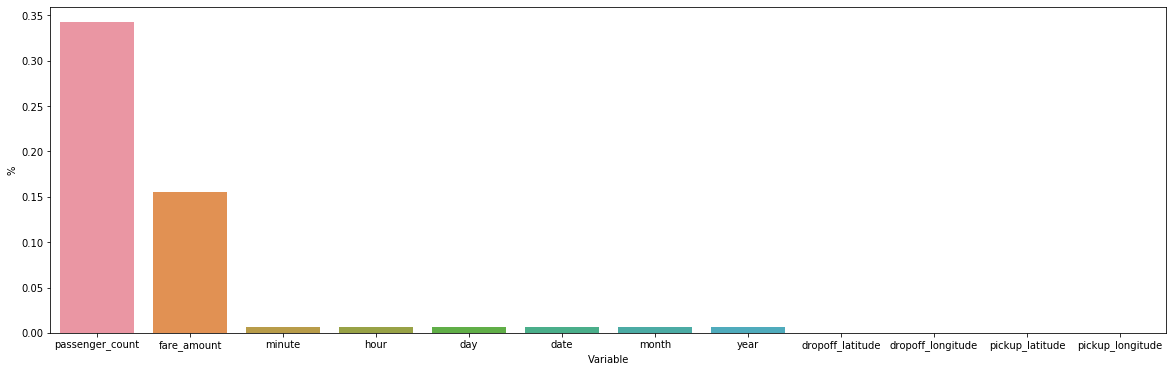

In [22]:
# Percentage of missing values are very less so dropping them.
plt.subplots(figsize=(20,6))
sns.barplot(missing_val['Variable'],missing_val['%'])

In [23]:
# Dropping values
train=train.dropna()

In [24]:
# Resetting
train.reset_index(drop=True,inplace=True)

In [25]:
# Cross checking
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [26]:
test.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [27]:
train.shape

(15986, 12)

In [28]:
################################################ Outlier Analysis #####################################################

train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'minute'],
      dtype='object')

In [29]:
col=['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
col[1]

'pickup_longitude'

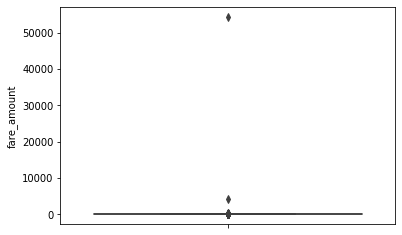

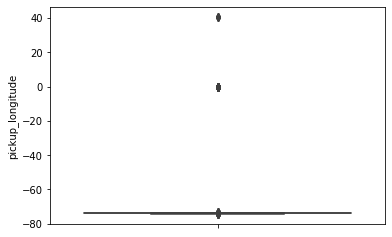

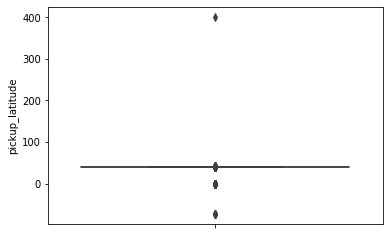

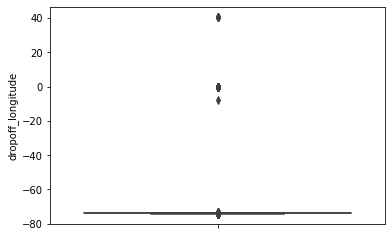

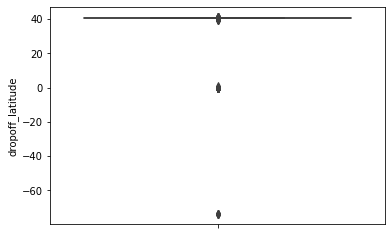

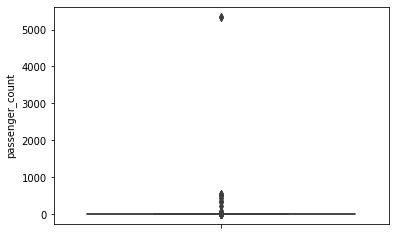

In [30]:
for i in col:
    sns.boxplot(y=train[i])
    plt.show()
    

In [31]:
train['fare_amount'].describe()

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [32]:
sum(train['fare_amount']<0)
#train.shape
#train = train.drop(train[train["fare_amount"]<0].index, axis=0)
#train.shape

3

In [33]:
# Exploring fare rates
train["fare_amount"].sort_values(ascending=True).head(10)

12952   -3.00
1976    -2.90
2418    -2.50
9922     0.00
2712     0.01
1374     1.14
4253     2.50
13141    2.50
15177    2.50
4299     2.50
Name: fare_amount, dtype: float64

In [34]:
train["fare_amount"].sort_values(ascending=False).head(10)

967      54343.00
1024      4343.00
574        453.00
932        434.00
1285       180.00
1429       165.00
6562       128.83
14062      108.00
12269      104.67
12835       96.00
Name: fare_amount, dtype: float64

In [35]:
# 1.> Negative fares as well as ultra higher fares (fare>434) which are practically impossible will be removed as they are outliers.
# 2.> Null values are already removed from the fare_amount.
# 3.> Fare can't be zero so also removing that entry.
# 4.> Latitude valid range for norther and southern hemishphere is -90 to 90 degrees.
# 5.> Longitude valid range for northern and southern hemisphere is -180 to 180 degrees.


In [36]:
Counter(train["fare_amount"]<1)

Counter({False: 15981, True: 5})

In [37]:
train.shape

(15986, 12)

In [38]:
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(15981, 12)

In [39]:
train = train.drop(train[train["fare_amount"]> 434 ].index, axis=0)
train.shape


(15978, 12)

In [40]:
train['passenger_count'].describe()

count    15978.000000
mean         2.623897
std         60.907373
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [41]:
# Exploring fare rates
train["passenger_count"].sort_values(ascending=False).head()

1097    5345.0
276     5334.0
8905     557.0
923      554.0
8426     537.0
Name: passenger_count, dtype: float64

In [42]:
Counter(train['passenger_count']>6)

Counter({False: 15959, True: 19})

In [43]:
# 1.> Passenger count can't be zero.
# 2.> Passenger count can't be greater than 6 and also can't be fractional.

In [44]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)
train.shape

(15959, 12)

In [45]:
Counter(train['passenger_count']==0)

Counter({False: 15902, True: 57})

In [46]:
train = train.drop(train[train["passenger_count"]==0 ].index, axis=0)
train.shape

(15902, 12)

In [47]:
# Exploring fare rates
train["passenger_count"].sort_values(ascending=True).head()

8782    0.12
0       1.00
9718    1.00
9721    1.00
9724    1.00
Name: passenger_count, dtype: float64

In [48]:
train["passenger_count"].value_counts()
# From this we came to know about two fractional entries which will be removed.

1.00    11234
2.00     2319
5.00     1044
3.00      675
4.00      327
6.00      301
1.30        1
0.12        1
Name: passenger_count, dtype: int64

In [49]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train = train.drop(train[train["passenger_count"] == 1.30 ].index, axis=0)
train.shape

(15900, 12)

In [50]:
# Range of passengers are now practically meaningful.
train["passenger_count"].value_counts()

1.0    11234
2.0     2319
5.0     1044
3.0      675
4.0      327
6.0      301
Name: passenger_count, dtype: int64

In [51]:
test['passenger_count'].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [52]:
# Checking for test data
test["passenger_count"].value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [53]:
train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [54]:
train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
year                 float64
month                float64
date                 float64
day                  float64
hour                 float64
minute               float64
dtype: object

In [55]:
# Range of passengers are now practically meaningful.
train["passenger_count"].value_counts()


1.0    11234
2.0     2319
5.0     1044
3.0      675
4.0      327
6.0      301
Name: passenger_count, dtype: int64

In [56]:
# Most of the latitude and Longitude values are identical to NYC cordinates that is 40 N(+) and 74 W(-) approximately.
# This data is about taxis running in NYC.
train['pickup_latitude'].describe()

count    15900.000000
mean        39.921346
std          6.817878
min        -74.006893
25%         40.734957
50%         40.752640
75%         40.767384
max        401.083332
Name: pickup_latitude, dtype: float64

In [57]:
train['dropoff_latitude'].describe()

count    15900.000000
mean        39.899216
std          6.186615
min        -74.006377
25%         40.734741
50%         40.753571
75%         40.768029
max         41.366138
Name: dropoff_latitude, dtype: float64

In [58]:
train['pickup_longitude'].describe()

count    15900.000000
mean       -72.474795
std         10.539101
min        -74.438233
25%        -73.992143
50%        -73.981686
75%        -73.966802
max         40.766125
Name: pickup_longitude, dtype: float64

In [59]:
train['dropoff_longitude'].describe()

count    15900.000000
mean       -72.465051
std         10.567028
min        -74.429332
25%        -73.991181
50%        -73.980156
75%        -73.963643
max         40.802437
Name: dropoff_longitude, dtype: float64

In [60]:
# Some cordinates have zero as there value which is not practical as we know the location.
# Also by getting the range of latitudes we come to know about various outliers in data.
# Some picking and dropping cordinates are same which accounts for useless data will remove them after calculating trip_distance.
train[(train.pickup_latitude==0) | (train.pickup_longitude)==0 |
      (train.dropoff_latitude==0)|(train.dropoff_longitude==0)].shape

(310, 12)

In [61]:
# Getting the range to determine outliers
print("Range of pickup_latitude is ", (min(train['pickup_latitude']),max(train['pickup_latitude'])))

Range of pickup_latitude is  (-74.006893, 401.083332)


In [62]:
print("Range of dropoff_latitude is ", (min(train['dropoff_latitude']),max(train['dropoff_longitude'])))

Range of dropoff_latitude is  (-74.006377, 40.802437)


In [63]:
# We will limit the cordinates as per our testing data to get more accurate predictions
print("Longitude Boundary in test data")
min(test.pickup_longitude.min(), test.dropoff_longitude.min()),max(test.pickup_longitude.max(), test.dropoff_longitude.max())

Longitude Boundary in test data


(-74.263242, -72.986532)

In [64]:
print("Latitude Boundary in test data")
min(test.pickup_latitude.min(), test.pickup_latitude.min()),max(test.pickup_latitude.max(), test.pickup_latitude.max())

Latitude Boundary in test data


(40.573143, 41.709555)

In [65]:
boundary={'min_lng':-74.263242,
              'min_lat':40.573143,
              'max_lng':-72.986532, 
              'max_lat':41.709555}

In [66]:
# Assigning (1) for outliers and (0) for non-outliers 
train.loc[~((train.pickup_longitude >= boundary['min_lng'] ) & (train.pickup_longitude <= boundary['max_lng']) &
            (train.pickup_latitude >= boundary['min_lat']) & (train.pickup_latitude <= boundary['max_lat']) &
            (train.dropoff_longitude >= boundary['min_lng']) & (train.dropoff_longitude <= boundary['max_lng']) &
            (train.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=1
train.loc[((train.pickup_longitude >= boundary['min_lng'] ) & (train.pickup_longitude <= boundary['max_lng']) &
            (train.pickup_latitude >= boundary['min_lat']) & (train.pickup_latitude <= boundary['max_lat']) &
            (train.dropoff_longitude >= boundary['min_lng']) & (train.dropoff_longitude <= boundary['max_lng']) &
            (train.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_outlier_loc']=0

print("Outlier vs Non-Outlier values")
print(train['is_outlier_loc'].value_counts())

Outlier vs Non-Outlier values
0.0    15552
1.0      348
Name: is_outlier_loc, dtype: int64


In [67]:
# Dropping outliers location
train=train.loc[train['is_outlier_loc']==0]
train.drop(['is_outlier_loc'],axis=1,inplace=True)

In [68]:
train.shape

(15552, 12)

In [69]:
# Cross Verifying
train[(train.pickup_latitude==0) | (train.pickup_longitude)==0 |
      (train.dropoff_latitude==0)|(train.dropoff_longitude==0)].shape

(0, 12)

In [70]:
# Summary of our Eda, MVA, Outliers

In [71]:
# Extracting a new feature that is travel distance.
# United States prefers and uses miles over km so we will calculate distance in miles.
# We divide latitudes and longitudes by 180/pi or multiply with pi/180(0.01744444444) where pi is 22/7.
# The radius of Earth is 6371Kms.
# The conversion factor from km to miles is 0.621372

from math import sin, cos, sqrt, atan2, radians,asin
def distance(lat1, lat2, lon1,lon2):
    p = 0.01745 
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))


In [72]:
train['trip_distance']=train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],
                                                       row['pickup_longitude'],row['dropoff_longitude']),axis=1)

In [73]:
Counter(train['trip_distance']==0)

Counter({False: 15398, True: 154})

In [74]:
Counter(train['fare_amount']==0)

Counter({False: 15552})

In [75]:
#  Removing outliers
train = train.drop(train[train['trip_distance']== 0].index, axis=0)

In [76]:
Counter(train['trip_distance']==0)

Counter({False: 15398})

In [77]:
# Please note that the distance we are calculating is the straight line shortest distance not the actual path.

In [78]:
test['trip_distance']=test.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude'],
                                                       row['pickup_longitude'],row['dropoff_longitude']),axis=1)

In [79]:
train['year']=train['year'].astype(int)
train['day']=train['day'].astype(int)
train['date']=train['date'].astype(int)
train['passenger_count']=train['passenger_count'].astype(int)
train['month']=train['month'].astype(int)
train['hour']=train['hour'].astype(int)
train['minute']=train['minute'].astype(int)

#train['year'].dtypes

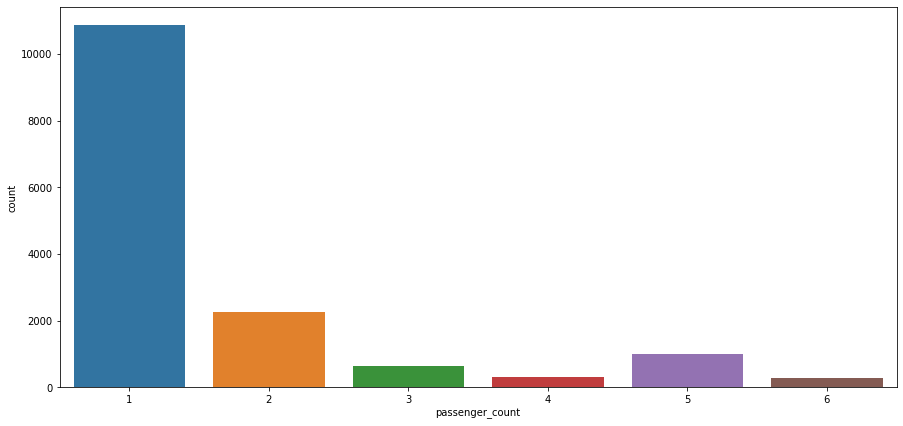

In [80]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

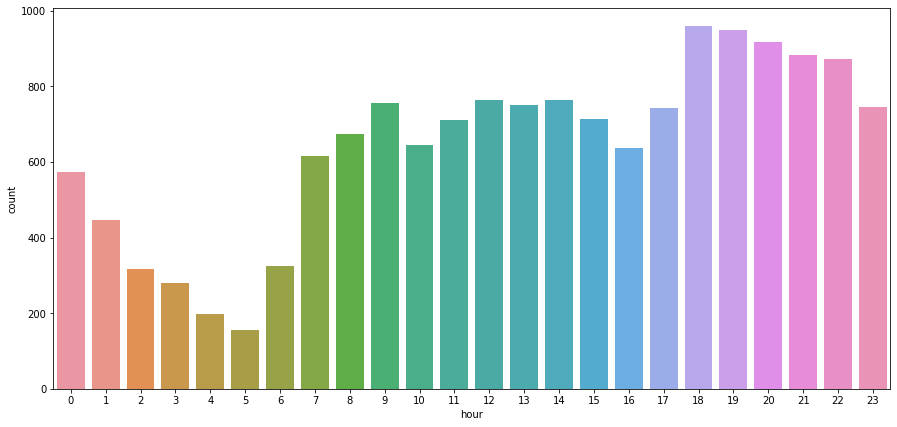

In [81]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="hour", data=train)

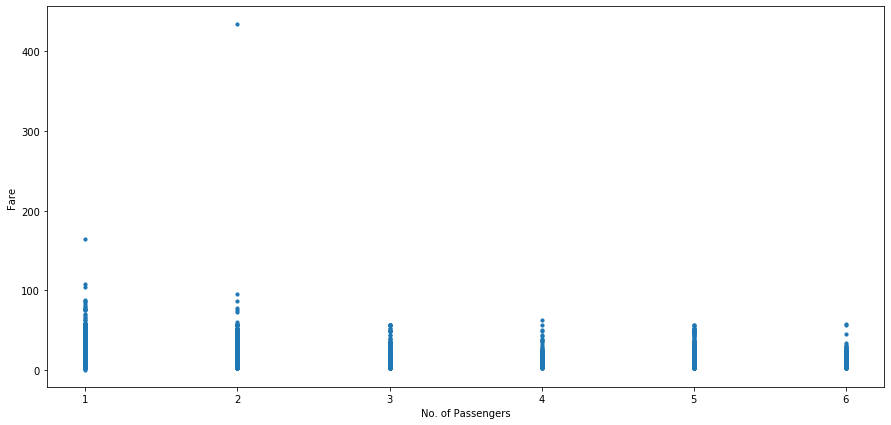

In [82]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

Text(0.5, 1.0, 'Trip Distance vs Fare Amount')

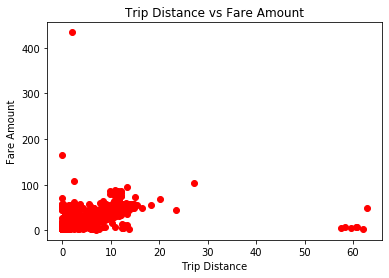

In [83]:
plt.scatter(x=train['trip_distance'],y=train['fare_amount'],c='r')
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")

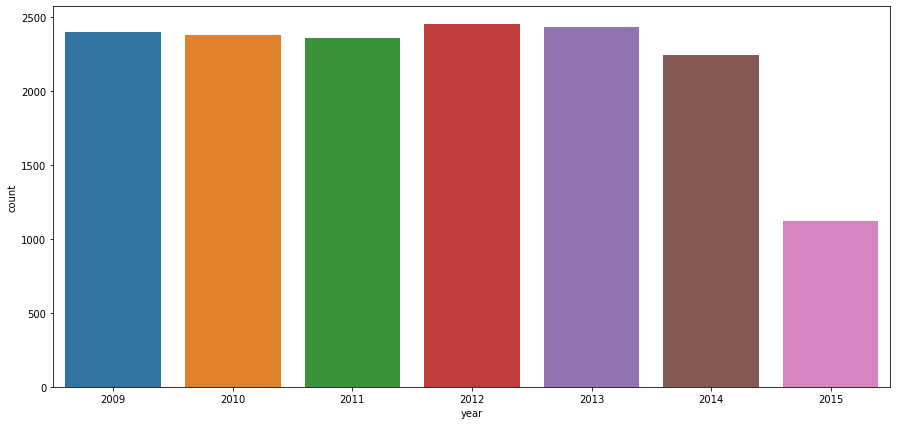

In [84]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="year", data=train)

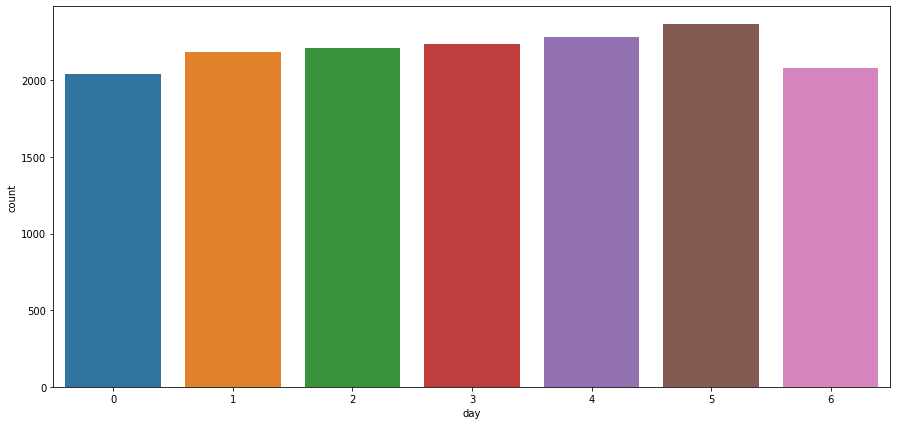

In [85]:
plt.figure(figsize=(15,7))
sns.countplot(x="day", data=train)

In [86]:
# Observations
#1.> Solos are taking more rides than other passenger counts which is practical in nature. The cab company can produce
#    attractive offers for solos to capture the market more as well as focus on their other segments of passengers.

#2.> Most of the rides are booked in the evening time duration from 6pm to 8pm which is also the rush hour.

#3.> Most of the revenue is generated from passengers travelling solos or in pair thus the company can introduce attractive
#    offers for travellers in pair like sharing of fare when the route is same to increase revenue.

#4.> There's no boom in the cab market during weekends but somewhat same every day.

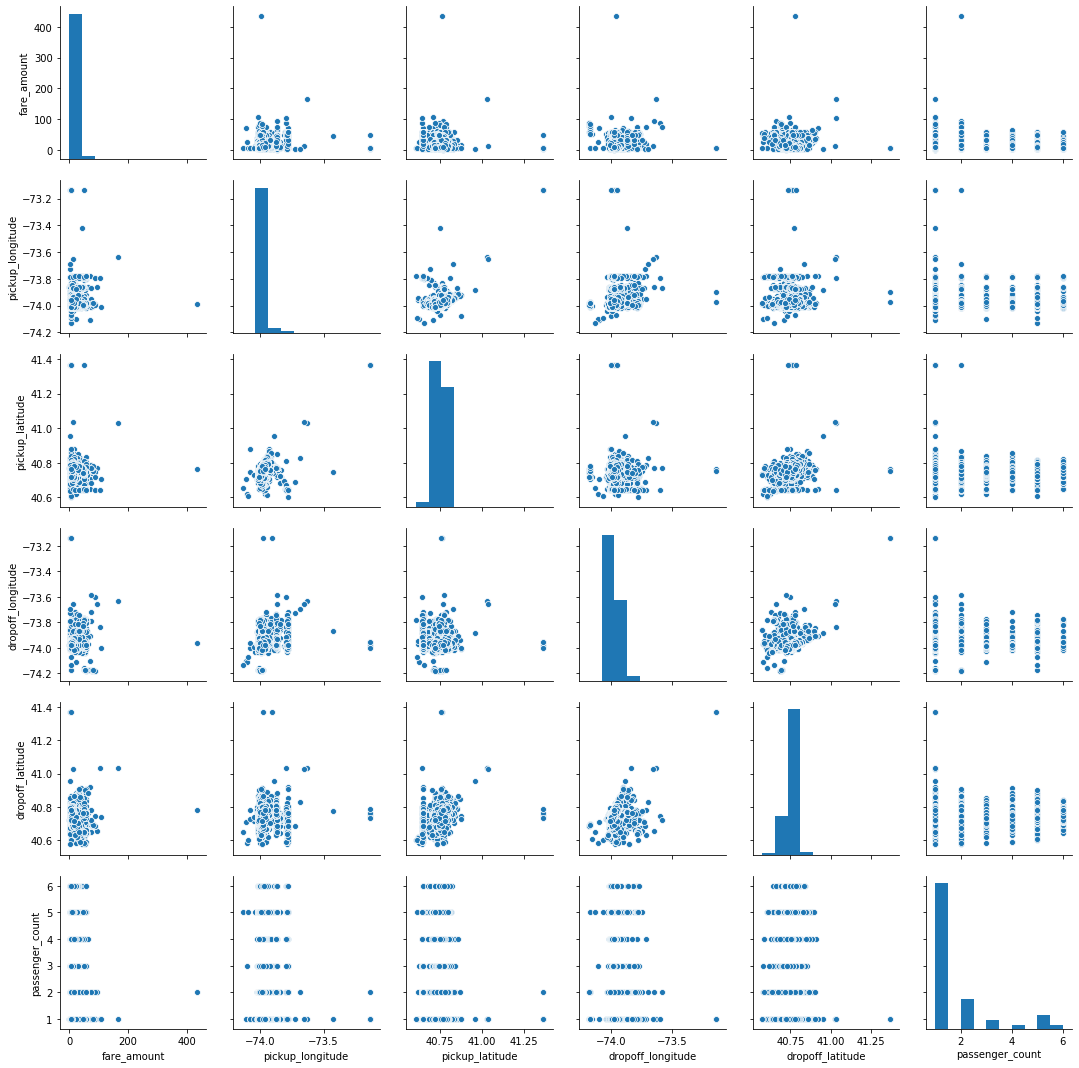

In [87]:
sns.pairplot(train[col])

(13.0, 0.0)

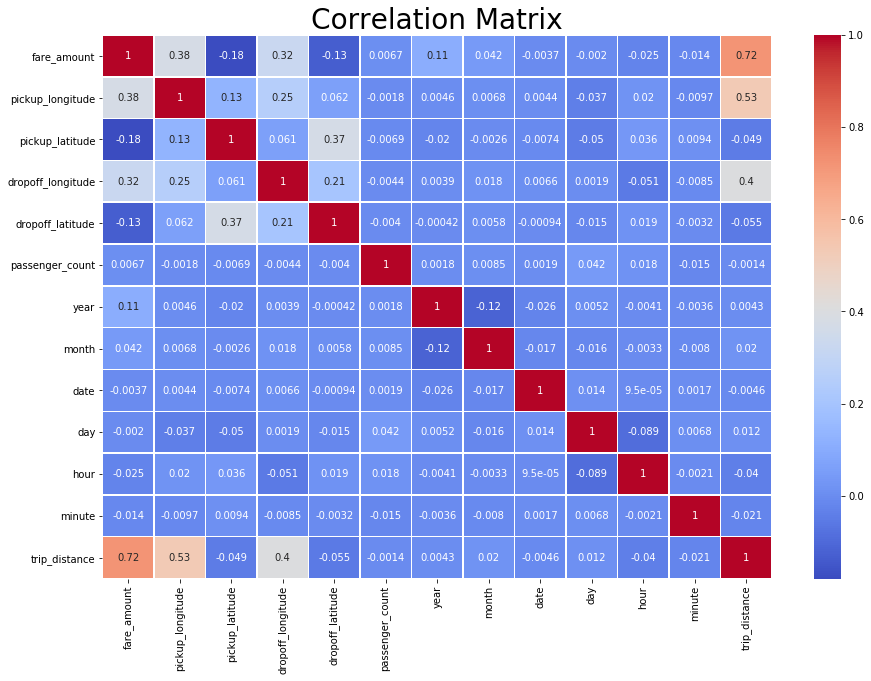

In [88]:
# Calculating Correlation matrix
correlation_matrix = train.corr()

# Converting it to dataframe
correlation_matrix = pd.DataFrame(correlation_matrix)

# Plotting heatmap for correlation matrix
plt.figure(figsize = (15, 10))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm',linewidths=0.5, linecolor='w', annot=True)
plt.title('Correlation Matrix', size=28)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [89]:
# Dropping latitude and longitudes as they are no longer needed as we have calculated distance.

In [90]:
# Creating backup
bckp_train2=train.copy()

In [91]:
train = train.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
train.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'minute', 'trip_distance'],
      dtype='object')

In [92]:
test = test.drop(['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'], axis=1)
test.columns

Index(['passenger_count', 'year', 'month', 'date', 'day', 'hour', 'minute',
       'trip_distance'],
      dtype='object')

In [93]:
# Standardizig test and train data after plotting

fare_amount


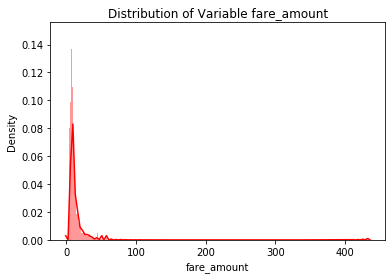

passenger_count


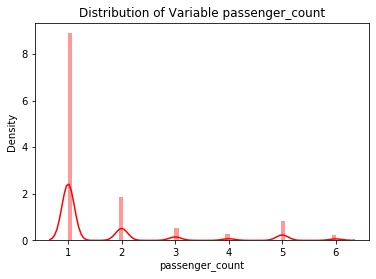

year


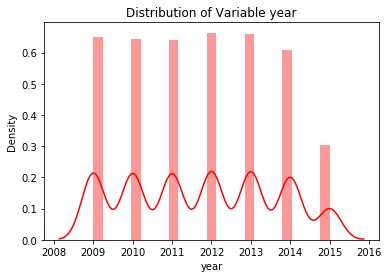

month


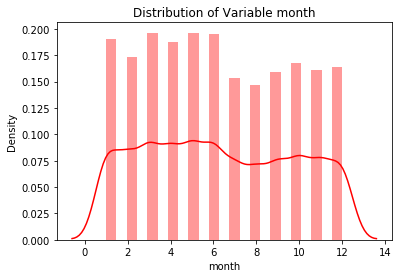

date


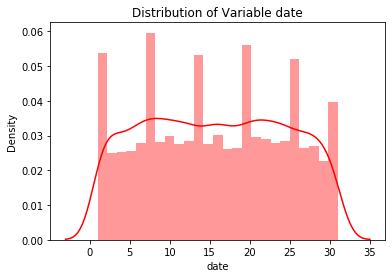

day


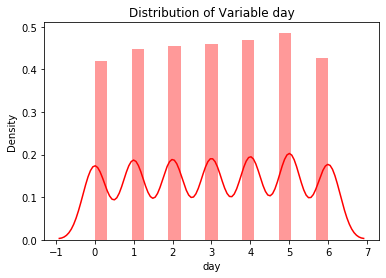

hour


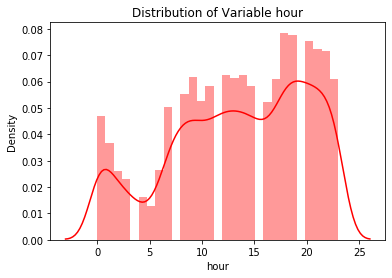

minute


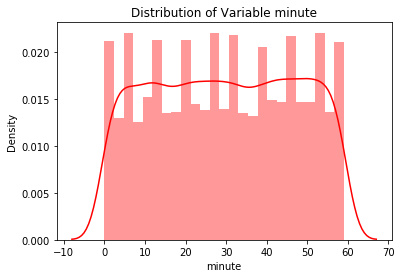

trip_distance


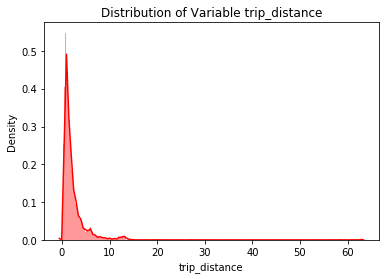

In [94]:

for i in ['fare_amount','passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'minute', 'trip_distance']:
    print(i)
    sns.distplot(train[i], bins='auto', color='red')
    plt.title('Distribution of Variable '+i)
    plt.ylabel('Density')
    plt.show()

In [95]:
col=['fare_amount', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'minute', 'trip_distance']
std_train=train.copy()

In [96]:
# Transforming skewed data via standardizing

new_variables = []
log_train = pd.DataFrame()
def apply_log1p(df, column_names):
    for i in column_names:
        new_col_name = "log_{0}".format(i)
        log_train[new_col_name] = np.log1p(df[i])
        new_variables.append(new_col_name)
        
        
# User defined function to take inverse of log
def apply_expm1(df):
    df = np.expm1(df)
    return df

In [97]:
# Select variables whose values has to be taken log
col=['fare_amount', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'minute', 'trip_distance']

#Function Call to apply_log1p
apply_log1p(train, col)

log_train
#train.describe()

,log_fare_amount,log_passenger_count,log_year,log_month,log_date,log_day,log_hour,log_minute,log_trip_distance
0,1.704748,0.693147,7.605890,1.945910,2.772589,0.000000,2.890372,3.295837,0.494922
1,2.884801,0.693147,7.606387,0.693147,1.791759,0.693147,2.833213,3.970292,1.832543
2,1.902108,1.098612,7.606885,2.197225,2.944439,1.386294,0.000000,3.583519,0.622335
3,2.163323,0.693147,7.607381,1.609438,3.091042,1.791759,1.609438,3.433987,1.007615
4,1.840550,0.693147,7.606387,1.386294,2.302585,0.693147,2.079442,3.951244,0.807376
...,...,...,...,...,...,...,...,...,...
15981,2.476538,0.693147,7.605890,1.791759,3.044522,1.098612,2.944439,4.043051,1.126877
15982,2.014903,0.693147,7.608374,2.564949,2.564949,1.609438,2.079442,3.737670,0.424060
15983,2.839078,1.098612,7.605890,2.079442,2.639057,0.000000,2.079442,4.077537,1.772895
15984,2.251292,0.693147,7.605890,2.484907,2.484907,1.098612,2.484907,2.995732,0.648518


In [98]:
train

,fare_amount,passenger_count,year,month,date,day,hour,minute,trip_distance
0,4.5,1,2009,6,15,0,17,26,0.640370
1,16.9,1,2010,1,5,1,16,52,5.249761
2,5.7,2,2011,8,18,3,0,35,0.863275
3,7.7,1,2012,4,21,5,4,30,1.739061
4,5.3,1,2010,3,9,1,7,51,1.242017
...,...,...,...,...,...,...,...,...,...
15981,10.9,1,2009,5,20,2,18,56,2.086004
15982,6.5,1,2014,12,12,4,7,41,0.528153
15983,16.1,2,2009,7,13,0,7,58,4.887872
15984,8.5,1,2009,11,11,2,11,19,0.912705


In [99]:
ltrain = log_train.drop(['log_fare_amount'], axis=1)
ltest = log_train['log_fare_amount']

train_ = train.drop(['fare_amount'], axis=1)
test_ = train['fare_amount']

In [100]:
print(ltrain.shape, ltest.shape) 

(15398, 8) (15398,)


In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(ltrain, ltest, test_size = 0.2, random_state=17)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

x_train, x_test, y_train, y_test = train_test_split(train_, test_, test_size = 0.2, random_state=17)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(12318, 8) (12318,) (3080, 8) (3080,)
(12318, 8) (12318,) (3080, 8) (3080,)


In [102]:
#Linear Regression
from sklearn.metrics import confusion_matrix
model_LR = LinearRegression()
model_LR.fit(xtrain, ytrain)
ypred_LR = model_LR.predict(xtest)
print('Train accuracy Score: ', model_LR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_LR.score(xtest, ytest)*100)

Train accuracy Score:  76.66311106131444
Test accuracy Score:  80.37472695456329


In [103]:
result_LR = pd.DataFrame()
result_LR['ytest'] = ytest
result_LR['ypred_LR'] = ypred_LR
result_LR['Actual_fare'] = y_test
result_LR['Predicted_fare'] = apply_expm1(result_LR['ypred_LR'])
result_LR

,ytest,ypred_LR,Actual_fare,Predicted_fare
4334,1.960095,2.273606,6.1,8.714363
9363,2.163323,2.115096,7.7,7.290382
3712,3.068053,2.984624,20.5,18.779070
8185,2.163323,2.082817,7.7,7.027046
15512,2.564949,2.431451,12.0,10.375379
...,...,...,...,...
2604,2.116256,2.258471,7.3,8.568447
10911,2.890372,2.902355,17.0,17.216992
6579,1.960095,1.925708,6.1,5.860003
9673,1.960095,1.941366,6.1,5.968261


In [104]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [105]:
#1.> Now we will split our data and build model on top of it.
#2.> We will save the model and use 
LR_mape = mean_absolute_percentage_error(y_test, result_LR['Predicted_fare'])
print('Mean Absolute Percentage Error: ', LR_mape)
print('Model is ', (100 - LR_mape), 'percentage correct.')

Mean Absolute Percentage Error:  18.04347362748669
Model is  81.95652637251331 percentage correct.


In [106]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(xtrain, ytrain)
ypred_RF = model_RF.predict(xtest)
print('Train accuracy Score: ', model_RF.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_RF.score(xtest, ytest)*100)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train accuracy Score:  95.95819169366153
Test accuracy Score:  78.4911058711412


In [107]:
result_RF = pd.DataFrame()
result_RF['ytest'] = ytest
result_RF['ypred_RF'] = ypred_RF
result_RF['Actual_fare'] = y_test
result_RF['Predicted_fare'] = apply_expm1(result_RF['ypred_RF'])
result_RF

,ytest,ypred_RF,Actual_fare,Predicted_fare
4334,1.960095,2.161890,6.1,7.687540
9363,2.163323,2.028582,7.7,6.603296
3712,3.068053,2.944328,20.5,17.997885
8185,2.163323,2.009629,7.7,6.460552
15512,2.564949,2.352034,12.0,9.506917
...,...,...,...,...
2604,2.116256,2.274716,7.3,8.725159
10911,2.890372,2.828214,17.0,15.915222
6579,1.960095,2.069172,6.1,6.918265
9673,1.960095,1.916177,6.1,5.794931


In [108]:
RF_mape = mean_absolute_percentage_error(y_test, result_RF['Predicted_fare'])
print('Mean Absolute Percentage Error: ', RF_mape)
print('Model is ', (100 - RF_mape), 'percentage correct.')

Mean Absolute Percentage Error:  19.98272401401539
Model is  80.01727598598461 percentage correct.


In [109]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(xtrain, ytrain)
ypred_DT = model_DT.predict(xtest)
print('Train accuracy Score: ', model_DT.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_DT.score(xtest, ytest)*100)

Train accuracy Score:  100.0
Test accuracy Score:  57.44669817842662


In [110]:
result_DT = pd.DataFrame()
result_DT['ytest'] = ytest
result_DT['ypred_DT'] = ypred_DT
result_DT['Actual_fare'] = y_test
result_DT['Predicted_fare'] = apply_expm1(result_DT['ypred_DT'])
result_DT

,ytest,ypred_DT,Actual_fare,Predicted_fare
4334,1.960095,2.066863,6.1,6.9
9363,2.163323,2.014903,7.7,6.5
3712,3.068053,3.122365,20.5,21.7
8185,2.163323,2.116256,7.7,7.3
15512,2.564949,2.525729,12.0,11.5
...,...,...,...,...
2604,2.116256,2.292535,7.3,8.9
10911,2.890372,3.068053,17.0,20.5
6579,1.960095,1.774952,6.1,4.9
9673,1.960095,1.774952,6.1,4.9


In [111]:
DT_mape = mean_absolute_percentage_error(y_test, result_DT['Predicted_fare'])
print('Mean Absolute Percentage Error: ', DT_mape)
print('Model is ', (100 - DT_mape), 'percentage correct.')

Mean Absolute Percentage Error:  31.1150094217654
Model is  68.8849905782346 percentage correct.


In [112]:
# Knn 
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor(n_neighbors=3)
model_KNR.fit(xtrain, ytrain)
ypred_KNR = model_KNR.predict(xtest)
print('Train accuracy Score: ', model_KNR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_KNR.score(xtest, ytest)*100)

Train accuracy Score:  83.45451979039309
Test accuracy Score:  69.0323119150741


In [113]:
result_KNR = pd.DataFrame()
result_KNR['ytest'] = ytest
result_KNR['ypred_KNR'] = ypred_KNR
result_KNR['Actual_fare'] = y_test
result_KNR['Predicted_fare'] = apply_expm1(result_KNR['ypred_KNR'])
result_KNR

,ytest,ypred_KNR,Actual_fare,Predicted_fare
4334,1.960095,2.341401,6.1,9.395795
9363,2.163323,1.874913,7.7,5.520252
3712,3.068053,2.716841,20.5,14.132449
8185,2.163323,2.399220,7.7,10.014581
15512,2.564949,2.301048,12.0,8.984643
...,...,...,...,...
2604,2.116256,2.214228,7.3,8.154338
10911,2.890372,2.677808,17.0,13.553154
6579,1.960095,2.238364,6.1,8.377978
9673,1.960095,1.960908,6.1,6.105775


In [114]:
KNR_mape = mean_absolute_percentage_error(y_test, result_KNR['Predicted_fare'])
print('Mean Absolute Percentage Error: ', KNR_mape)
print('Model is ', (100 - KNR_mape), 'percentage correct.')

Mean Absolute Percentage Error:  24.93735357401775
Model is  75.06264642598225 percentage correct.


In [115]:
from sklearn import ensemble
model_GBR = ensemble.GradientBoostingRegressor()
model_GBR.fit(xtrain, ytrain)
ypred_GBR = model_GBR.predict(xtest)
print('Train accuracy Score: ', model_GBR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_GBR.score(xtest, ytest)*100)

Train accuracy Score:  83.21503395671597
Test accuracy Score:  82.33304392421398


In [116]:
result_GBR = pd.DataFrame()
result_GBR['ytest'] = ytest
result_GBR['ypred_GBR'] = ypred_GBR
result_GBR['Actual_fare'] = y_test
result_GBR['Predicted_fare'] = apply_expm1(result_GBR['ypred_GBR'])
result_GBR

,ytest,ypred_GBR,Actual_fare,Predicted_fare
4334,1.960095,2.202530,6.1,8.047876
9363,2.163323,2.051889,7.7,6.782588
3712,3.068053,2.949373,20.5,18.093969
8185,2.163323,2.099363,7.7,7.160968
15512,2.564949,2.432098,12.0,10.382734
...,...,...,...,...
2604,2.116256,2.269186,7.3,8.671525
10911,2.890372,2.904146,17.0,17.249654
6579,1.960095,1.985634,6.1,6.283662
9673,1.960095,1.970159,6.1,6.171819


In [117]:
GBR_mape = mean_absolute_percentage_error(y_test, result_GBR['Predicted_fare'])
print('Mean Absolute Percentage Error: ', GBR_mape)
print('Model is ', (100 - GBR_mape), 'percentage correct.')

Mean Absolute Percentage Error:  17.596070321670634
Model is  82.40392967832936 percentage correct.
